<a href="https://colab.research.google.com/github/ImenBoukhari/MachineLearning/blob/main/MiniProjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from PIL import Image

##Data Preparation

In [4]:

from google.colab import drive
drive.mount('/content/drive')

NOR = glob.glob('/content/drive/MyDrive/data/normal/*.*')
BEN = glob.glob('/content/drive/MyDrive/data/benign/*.*')
CAN = glob.glob('/content/drive/MyDrive/data/malignant/*.*')
data = []
labels = []


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
for i in NOR:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (240,240))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in BEN:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (240,240))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in CAN:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (240,240))
    image=np.array(image)
    data.append(image)
    labels.append(1)


In [6]:
data = np.array(data)
labels = np.array(labels)
# Let's say we want to split the data in 70:20:10 for train:valid:test dataset
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(data, labels, train_size=0.7, shuffle = True, random_state=1)
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.6666666 (that is 66.66% of remaining data)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.666666, shuffle = True, random_state=1)

print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(7849, 240, 240)
(7849,)
(1121, 240, 240)
(1121,)
(2244, 240, 240)
(2244,)


(None, None)

##Data Visualization

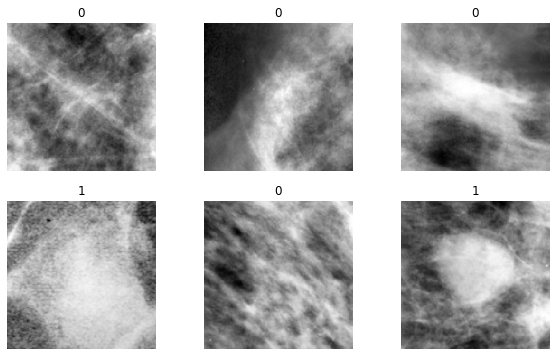

In [7]:
 # First six images from the training set with their lables:
plt.figure(figsize=(10, 6))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(np.reshape(X_train[i],(240,240)),'gray')
    plt.title(Y_train[i])
    plt.axis("off")

## Model Creation

A sequential model consisting four convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them is used. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). Finally, since the goal is to perform binary classification, the sigmoid activation function is used at final layer.
In oredr to reduce the overfitting, the dropout regularization is also utilized between the layers.

In [8]:
num_classes = 3
img_height = 240
img_width = 240

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(img_height,img_width,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 16)       0

## Compile and Train the Model
The (tf.keras.optimizers.Adam) optimizer and (tf.keras.losses.CategoricalCrossentropy) loss function are used at this step for compiling the model, and then the model is trained using the training dataset.

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss=tf.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.AUC(curve="ROC"),'accuracy'])
y_train = tf.keras.utils.to_categorical(Y_train, 3)
y_valid = tf.keras.utils.to_categorical(Y_valid, 3)


epochs =50
history = model.fit(
  X_train, y_train,
  validation_data=(X_valid,y_valid),
  epochs=epochs
)

Epoch 1/50
246/246 [==============================] - 11s 31ms/step - loss: 2.5082 - auc: 0.9065 - accuracy: 0.7984 - val_loss: 0.3806 - val_auc: 0.9629 - val_accuracy: 0.8519
Epoch 2/50
246/246 [==============================] - 7s 29ms/step - loss: 0.4193 - auc: 0.9462 - accuracy: 0.8423 - val_loss: 0.3070 - val_auc: 0.9682 - val_accuracy: 0.8965
Epoch 3/50
246/246 [==============================] - 7s 29ms/step - loss: 0.5074 - auc: 0.9162 - accuracy: 0.8218 - val_loss: 0.4269 - val_auc: 0.9266 - val_accuracy: 0.8492
Epoch 4/50
246/246 [==============================] - 8s 32ms/step - loss: 0.4716 - auc: 0.9123 - accuracy: 0.8181 - val_loss: 0.4301 - val_auc: 0.9274 - val_accuracy: 0.8492
Epoch 5/50
246/246 [==============================] - 8s 32ms/step - loss: 0.4661 - auc: 0.9130 - accuracy: 0.8193 - val_loss: 0.4324 - val_auc: 0.9275 - val_accuracy: 0.8492
Epoch 6/50
246/246 [==============================] - 7s 30ms/step - loss: 0.4627 - auc: 0.9178 - accuracy: 0.8213 - val_los

## 8. Model Evaluation (Accuracy, Loss and AUC-ROC)

Text(0.5, 1.0, 'Training and Validation Sets Loss')

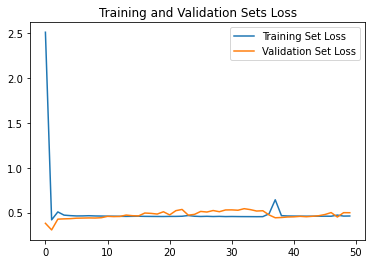

In [10]:
epochs_range = range(epochs)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs_range, loss, label='Training Set Loss')
plt.plot(epochs_range, val_loss, label='Validation Set Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Sets Loss')



## 6. Saving Model

In [11]:
from tensorflow.keras.models import load_model

In [12]:
model.save('/content/drive/MyDrive/data/ModelClassifier.h5')


In [13]:
import cv2

In [14]:
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/data/benign/10000.png")
lane_image = np.copy(image)
img = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)


resize=cv2.resize(img,(240,240))
pred=model.predict(np.expand_dims(resize/255,0))
pred

1/1 [==============================] - 0s 95ms/step


array([[8.3160883e-01, 1.6839091e-01, 2.0344359e-07]], dtype=float32)